# Requirements

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.pylabtools import figsize

In [67]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **mean temperature** in the city of Delhi. Your task involves employing bagging and boosting methods to forecast the **mean temperature**. To accomplish this use data from the preceding three days, consisting of **mean temperature**, **humidity**, **wind speed**, and **mean pressure**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

In [68]:
# !gdown 1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC # Download the dataset.

## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [1]:
# Write your code here. Add as many boxes as you need.
import pandas as pd
df = pd.read_csv("./climate-data.csv")

In [2]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


Explore the dataset using visualizations of your choice.

In [3]:
# Write your code here. Add as many boxes as you need.
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [4]:
df["date"] = pd.to_datetime(df["date"])


In [5]:
df.set_index(keys=["date"], inplace=True)


In [6]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [7]:
df.sort_index(inplace=True)


# Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [8]:
def shift_columns(df:pd.DataFrame,columns:list[str],n:int):
    df_copy = df.copy(deep=True)
    for column in columns:
        for i in range(1, n+1):
            df_copy[f'{column}_shifted_{i}'] = df_copy[column].shift(i)
    return df_copy

In [9]:
# Write your code here. Add as many boxes as you need.
columns = list(df.columns)
df = shift_columns(df,columns,3)

In [10]:
df

,meantemp,humidity,wind_speed,meanpressure,meantemp_shifted_1,meantemp_shifted_2,meantemp_shifted_3,humidity_shifted_1,humidity_shifted_2,humidity_shifted_3,wind_speed_shifted_1,wind_speed_shifted_2,wind_speed_shifted_3,meanpressure_shifted_1,meanpressure_shifted_2,meanpressure_shifted_3
date,,,,,,,,,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,7.400000,92.000000,2.980000,1017.800000,10.000000,NaN,NaN,84.500000,NaN,NaN,0.000000,NaN,NaN,1015.666667,NaN,NaN
2013-01-03,7.166667,87.000000,4.633333,1018.666667,7.400000,10.000000,NaN,92.000000,84.500000,NaN,2.980000,0.000000,NaN,1017.800000,1015.666667,NaN
2013-01-04,8.666667,71.333333,1.233333,1017.166667,7.166667,7.400000,10.000000,87.000000,92.000000,84.500000,4.633333,2.980000,0.000000,1018.666667,1017.800000,1015.666667
2013-01-05,6.000000,86.833333,3.700000,1016.500000,8.666667,7.166667,7.400000,71.333333,87.000000,92.000000,1.233333,4.633333,2.980000,1017.166667,1018.666667,1017.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,16.850000,17.142857,14.000000,67.550000,74.857143,94.300000,8.335000,8.784211,9.085000,1017.200000,1016.952381,1014.350000
2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.217391,16.850000,17.142857,68.043478,67.550000,74.857143,3.547826,8.335000,8.784211,1015.565217,1017.200000,1016.952381
2016-12-30,14.095238,89.666667,6.266667,1017.904762,15.238095,17.217391,16.850000,87.857143,68.043478,67.550000,6.000000,3.547826,8.335000,1016.904762,1015.565217,1017.200000


In [11]:
df.dropna(axis=0,inplace=True)

<Axes: >

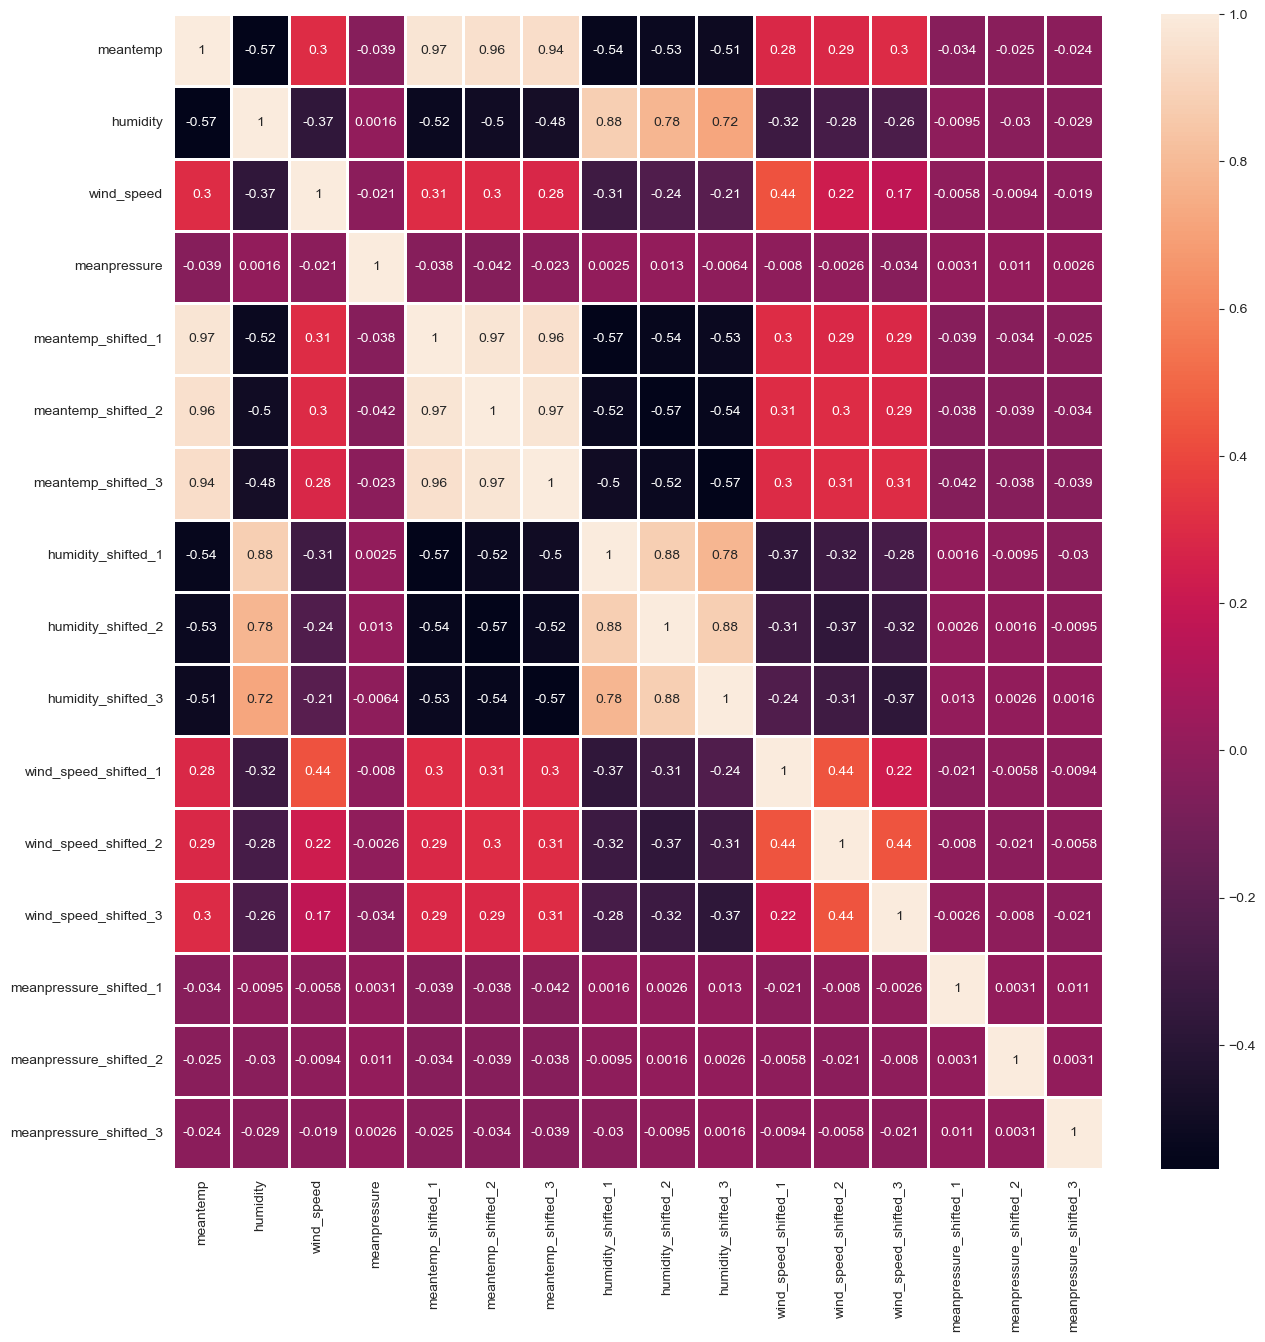

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidths=2)

In [13]:
columns

['meantemp', 'humidity', 'wind_speed', 'meanpressure']

In [81]:
# sns.pairplot(df)

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [82]:
# Write your code here. Add as many boxes as you need.
df.sort_index(inplace=True)

In [83]:
X,y = df.drop(columns=columns,axis=1),df[columns]

In [91]:
y

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
2013-01-06,7.000000,82.800000,1.480000,1018.000000
2013-01-07,7.000000,78.600000,6.300000,1020.000000
2013-01-08,8.857143,63.714286,7.142857,1018.714286
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [94]:
from sklearn.ensemble import RandomForestRegressor

# Write your code here. Add as many boxes as you need.
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Use the trained model to make predictions for the test set.

In [95]:
# Write your code here. Add as many boxes as you need.
y_pred = model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [96]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Write your code here. Add as many boxes as you need.
for i, column in enumerate(columns):
    print(f'{column} R2: {r2_score(y_test[column], y_pred[:, i])}')
    print(f'{column} RMSE: {np.sqrt(mean_squared_error(y_test[column], y_pred[:, i]))}')
    print('---' * 10)

meantemp R2: 0.868474540343996
meantemp RMSE: 2.0525499168130312
------------------------------
humidity R2: 0.7881656705625603
humidity RMSE: 7.841618474161858
------------------------------
wind_speed R2: 0.15324669027983173
wind_speed RMSE: 3.712868759523657
------------------------------
meanpressure R2: 0.0009698728880975782
meanpressure RMSE: 402.52706813065475
------------------------------


### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [97]:
from xgboost import XGBRegressor

# Write your code here. Add as many boxes as you need.
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Use the trained model to make predictions for the test set.

In [99]:
# Write your code here. Add as many boxes as you need.
y_pred = xgb.predict(X_test)


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [100]:
# Write your code here. Add as many boxes as you need.
for i, column in enumerate(columns):
    print(f'{column} R2: {r2_score(y_test[column], y_pred[:, i])}')
    print(f'{column} RMSE: {np.sqrt(mean_squared_error(y_test[column], y_pred[:, i]))}')
    print('---' * 10)

meantemp R2: 0.8905448673528159
meantemp RMSE: 1.8724355558711852
------------------------------
humidity R2: 0.7616662863236173
humidity RMSE: 8.31764302052873
------------------------------
wind_speed R2: -0.005118522129751613
wind_speed RMSE: 4.045198010192425
------------------------------
meanpressure R2: 0.0008544314021746713
meanpressure RMSE: 402.5503241763388
------------------------------


# Laboratory Exercise - Bonus Task (+ 2 points)

Define the forecasting model using the **Keras Sequential API** (`keras.models.Sequential`), incorporating one or more LSTM layers along with additional relevant layers (`keras.layers`). Be cautious when specifying the configuration of the final layer to ensure proper model output for the forecasting task.

In [102]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_X = scaler.fit_transform(X_train)
test_X = scaler.transform(X_test)

In [104]:
y.shape[1]

4

In [105]:
train_X= train_X.reshape(train_X.shape[0], 3, 4)
test_X = test_X.reshape(test_X.shape[0], 3, 4)

In [106]:
from keras.layers import LSTM, Dense
from keras import Sequential, Input

model = Sequential([
    Input((3, 4)), # (timesteps, features)
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(32, activation="relu"),
    Dense(1, activation="linear")
])

In [107]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 64)             17664     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [111]:
history = model.fit(train_X, y_train, validation_split=0.2, epochs=64, batch_size=8)


Epoch 1/64


2024-12-12 12:59:05.014450: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


117/117 [==============================] - 1s 2ms/step - loss: 235445.3750 - mean_squared_error: 235445.3750 - val_loss: 184964.2031 - val_mean_squared_error: 184964.2031
Epoch 2/64
117/117 [==============================] - 0s 1ms/step - loss: 182720.7188 - mean_squared_error: 182720.7188 - val_loss: 183125.3281 - val_mean_squared_error: 183125.3281
Epoch 3/64
117/117 [==============================] - 0s 1ms/step - loss: 181462.1250 - mean_squared_error: 181462.1250 - val_loss: 182095.4375 - val_mean_squared_error: 182095.4375
Epoch 4/64
117/117 [==============================] - 0s 1ms/step - loss: 180671.4688 - mean_squared_error: 180671.4688 - val_loss: 181427.4375 - val_mean_squared_error: 181427.4375
Epoch 5/64
117/117 [==============================] - 0s 1ms/step - loss: 180261.7344 - mean_squared_error: 180261.7344 - val_loss: 181163.2812 - val_mean_squared_error: 181163.2812
Epoch 6/64
117/117 [==============================] - 0s 1ms/step - loss: 180003.4688 - mean_squared_

<Axes: >

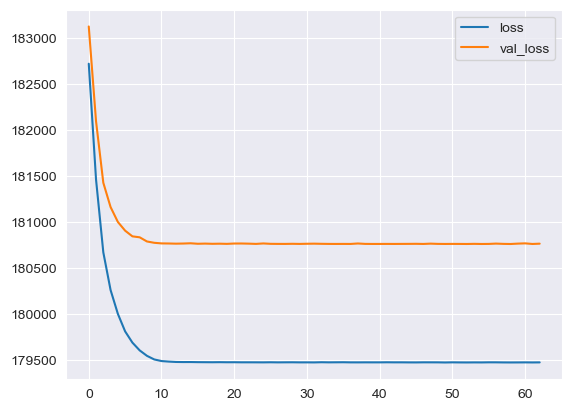

In [112]:

sns.lineplot(history.history['loss'][1:], label='loss')
sns.lineplot(history.history['val_loss'][1:], label='val_loss')

In [113]:
pred_y = model.predict(test_X)


10/10 [==============================] - 0s 654us/step


In [117]:
for i, column in enumerate(columns):
    print(f'{column} R2: {r2_score(y_test[column], y_pred[:, i])}')
    print(f'{column} RMSE: {np.sqrt(mean_squared_error(y_test[column], y_pred[:, i]))}')
    print('---' * 10)


meantemp R2: 0.8905448673528159
meantemp RMSE: 1.8724355558711852
------------------------------
humidity R2: 0.7616662863236173
humidity RMSE: 8.31764302052873
------------------------------
wind_speed R2: -0.005118522129751613
wind_speed RMSE: 4.045198010192425
------------------------------
meanpressure R2: 0.0008544314021746713
meanpressure RMSE: 402.5503241763388
------------------------------
